In [26]:
from typing import Tuple
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Import the different mountains from mountain.py
from mountain import Mountain_one

# Part 2 - Report

### Exercise 6

Expressing this problem formally as a MDP is simple:

The finite set of states $\mathcal{S}$ is equal to every possible position in the gridworld.

The finite set of actions $\mathcal{A}$ is composed of the directions *right*, *up-right* and *down-right*.

As the robot's actions are deterministic, he transition probability matrix $\mathcal{T}$ is composed of all 1s.

The reward function $\mathcal{R}$ is equal to the negative roughness index of the gridworld.

The discount factor $\gamma$ is arbitrary, but lets set it to 0.5.

The policy $\pi_\text{str}$ of walking straight ahead means that the row of the robot in the gridworld stays constant.

Given starting state s = (row, column) = (i, j), the value function can be computed as:

$ v_{\pi_\text{str}}(i, j) = R(i, j) + \gamma v_{\pi_\text{str}}(i, j+1)$

In [27]:
# Instantiate the mountain environment
mountain = Mountain_one()
m, n = len(mountain.get_map()), len(mountain.get_map()[0])

# Set the gamma value
gamma = 0.5

In [28]:
# Then create the given policy π_str following format (probability, action)
π_str = np.array([[[(0.0, "upforward"), (1.0 if column < n-1 else 0.0, "forward"), (0.0, "downforward")] for column in range(n)] for row in range(m)], dtype="object")

In [29]:
# Let's run the policy evaluation on the given environment

# Left-to-right
evaluation_ltr = [[0] * n for _ in range(m)]
for k in range(10): # Run evaluation for 10 episodes
    for column in range(n):
        for row in range(m):
            state = (row, column)
            evaluation = 0
            for probability, action in π_str[state]:
                if probability > 0:
                    (next_row, next_column) = mountain.next_state(state, action)
                    reward = mountain.get_reward(state, action)
                    evaluation += probability * (reward + gamma * evaluation_ltr[next_row][next_column])
            
            evaluation_ltr[row][column] = evaluation

# Right-to-left
evaluation_rtl = [[0] * n for _ in range(m)]
for k in range(10): # Run evaluation for 10 episodes
    for column in reversed(range(n)):
        for row in range(m):
            state = (row, column)
            evaluation = 0
            for probability, action in π_str[state]:
                if probability > 0:
                    (next_row, next_column) = mountain.next_state(state, action)
                    reward = mountain.get_reward(state, action)
                    evaluation += probability * (reward + gamma * evaluation_rtl[next_row][next_column])
            
            evaluation_rtl[row][column] = evaluation

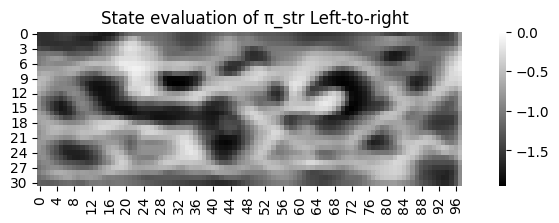

In [30]:
# Let's plot the values as a heatmap
plt.figure(figsize=(7,2))
sns.heatmap(evaluation_ltr, cmap="gray")
plt.title("State evaluation of π_str Left-to-right")
plt.show()

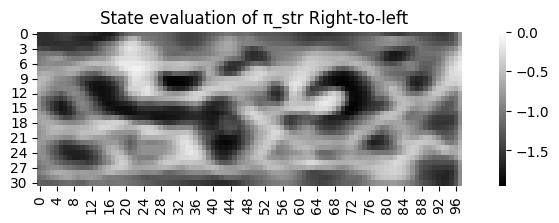

In [31]:
# Let's plot the values as a heatmap
plt.figure(figsize=(7,2))
sns.heatmap(evaluation_rtl, cmap="gray")
plt.title("State evaluation of π_str Right-to-left")
plt.show()

In [32]:
evaluation_rtl == evaluation_ltr

False

------------------------------------------
### 3. (*)

The resulting evaluations are very similar, as we can see from the plots. However, they are not exactly equal. They differ because we are using results from the current iteration on the right-to-left approach, but results from the last iteration when doing the left-to-right apporach. Therefore they will converge slightly differently. However, as they both converge towards a common target they will be very similar.

------------------------------------------

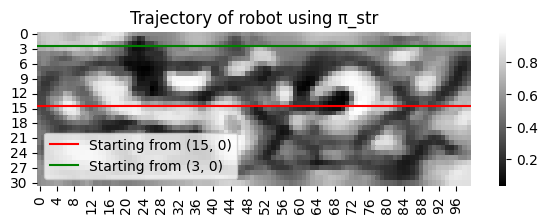

In [33]:
# Plot the trajectory followed by the robot starting from (15, 0) or (3, 0)
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot([0, n], [15, 15], c="r", label="Starting from (15, 0)")
plt.plot([0, n], [3, 3], c="g", label="Starting from (3, 0)")
plt.title("Trajectory of robot using π_str")
plt.legend()
plt.show()

The optimal starting row for the policy $\pi_\text{str}$ is equal to the row with the maximal value at column 0.

In [34]:
optimal_starting_row = np.argmax(np.array(evaluation_ltr)[:, 0])
print("Optimal starting row for π_str using left-to-right is", optimal_starting_row)

optimal_starting_row = np.argmax(np.array(evaluation_rtl)[:, 0])
print("Optimal starting row for π_str using right-to-left is", optimal_starting_row)

Optimal starting row for π_str using left-to-right is 10
Optimal starting row for π_str using right-to-left is 10


------------------------------------------
### 7. (*)

No, the two policy evaluations are equal, and therefore we have learned the same thing.

------------------------------------------

The policy $\pi_\text{rnd}$ means that we have a $\frac{1}{3}$ chance of either walking up-right, right or down-right.

Given starting state s = (row, column) = (i, j), the value function can be computed as:

$ v_{\pi_\text{rnd}}(i, j) = \frac{1}{3} * (R((i, j), \text{"upforward"}) + \gamma (v_{\pi_\text{rnd}}(i-1, j+1)) + R((i, j), \text{"forward"}) + \gamma v_{\pi_\text{rnd}}(i, j+1) + R((i, j), \text{"downforward"}) + \gamma v_{\pi_\text{rnd}}(i+1, j+1))$

(*if we are in the middle rows, if we are at either edge row, moving up/down is not allowed and we then only divide by 2).

In [35]:
# Then create the random policy π_rnd
π_rnd = np.array([[[(0.0 if row == 0 or column == n-1 else 0.5 if row == m-1 else 1/3, "upforward"), (0.0 if column == n-1 else 0.5 if row == 0 or row == m-1 else 1/3, "forward"), (0.0 if row == m-1 or column == n-1 else 0.5 if row == 0 else 1/3, "downforward")] for column in range(n)] for row in range(m)], dtype="object")

In [36]:
# Let's run the policy evaluation using this new random policy
evaluation_rnd = [[0] * n for _ in range(m)]
for k in range(10): # Run evaluation for 10 episodes
    for column in reversed(range(n)):
        for row in range(m):
            state = (row, column)
            evaluation = 0
            for probability, action in π_rnd[state]:
                if probability > 0:
                    (next_row, next_column) = mountain.next_state(state, action)
                    reward = mountain.get_reward(state, action)
                    evaluation += probability * (reward + gamma * evaluation_rnd[next_row][next_column])

            evaluation_rnd[row][column] = evaluation

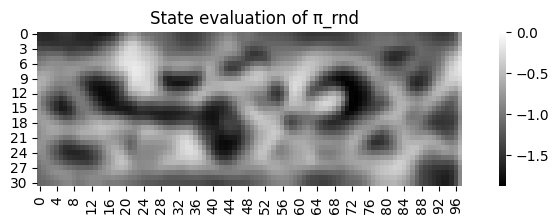

In [37]:
# Let's plot the values as a heatmap
plt.figure(figsize=(7,2))
sns.heatmap(evaluation_rnd, cmap="gray")
plt.title("State evaluation of π_rnd")
plt.show()

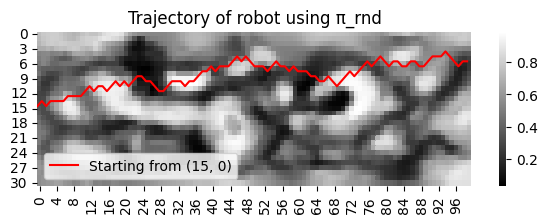

In [38]:
# Sample a trajectory following the random policy
trajectory = [15]
for column in range(n-1):
    current_row = trajectory[column]
    action = np.random.choice(π_rnd[current_row, column, :, 1], p=π_rnd[current_row, column, :, 0].astype(np.float64))
    next_row, _ = mountain.next_state((current_row, column), action)
    trajectory.append(next_row)

# Plot the sample trajectory followed by the robot starting from (15, 0)
# using the random policy
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot(np.arange(n), trajectory, c="r", label="Starting from (15, 0)")
plt.title("Trajectory of robot using π_rnd")
plt.legend()
plt.show()

In [39]:
optimal_starting_row = np.argmax(np.array(evaluation_rnd)[:, 0])
print("Optimal starting row for π_rnd is", optimal_starting_row)

Optimal starting row for π_rnd is 10


------------------------------------------
### 10. (*)

No, we can not say we learned anything different. From the plots we can see that they look very similar. We can also see this as the optimal starting row is 10 for both $\pi_\text{rnd}$ and $\pi_\text{str}$.

------------------------------------------

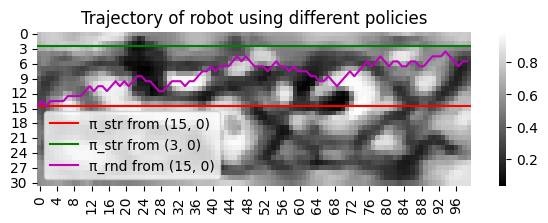

In [40]:
# Plot the trajectory followed by the robot starting from (15, 0) or (3, 0)
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot([0, n], [15, 15], c="r", label="π_str from (15, 0)")
plt.plot([0, n], [3, 3], c="g", label="π_str from (3, 0)")
plt.plot(np.arange(n), trajectory, c="m", label="π_rnd from (15, 0)")
plt.title("Trajectory of robot using different policies")
plt.legend()
plt.show()

In [41]:
print("π_str((15, 0)): %.4f" %evaluation_ltr[15][0])
print("π_str((3, 0)): %.4f" %evaluation_ltr[3][0])
print("π_rnd((15, 0)): %.4f" %evaluation_rnd[15][0])

π_str((15, 0)): -0.8362
π_str((3, 0)): -1.3877
π_rnd((15, 0)): -0.7831


------------------------------------------
### 11. (*)

If the robot can choose its initial position and policy, the optimal choice would be $\pi_\text{rnd}$ and starting row 15. This is because $\pi_\text{rnd}((15, 0)) \approx -0.7831$ which is slightly higher than the other $\pi_\text{str}((15, 0)) \approx -0.8362$ and $\pi_\text{str}((3, 0)) \approx -1.3877$.

------------------------------------------

As we can see, following a single action without any exploration makes the evaluation a bit worse! Therefore, exploration is slightly affecting the final results. Using $\pi_\text{rnd}$ which adds a lot of exploration, leads to the evaluation being a bit higher.

Let's use policy iteration to approximate a optimal policy!

In [42]:
# Start from π_rnd
π_opt1 = deepcopy(π_rnd)
π_improved = np.array([[[(0.0, "upforward"), (0.0, "forward"), (0.0, "downforward")] for column in range(n)] for row in range(m)], dtype="object")

# Run until converged at a single policy
iterations = 0
while np.any(π_improved != π_opt1):
    iterations += 1
    π_improved = deepcopy(π_opt1)
    
    # Policy evaluation
    epsilon = 0.005
    max_change = 1
    evaluation_opt1 = [[0] * n for _ in range(m)]
    while max_change > epsilon:
        max_change = 0
        for column in range(n):
            for row in range(m):
                state = (row, column)
                evaluation = 0
                for probability, action in π_improved[state]:
                    if probability > 0:
                        (next_row, next_column) = mountain.next_state(state, action)
                        reward = mountain.get_reward(state, action)
                        evaluation += probability * (reward + gamma * evaluation_opt1[next_row][next_column])

                max_change = max(abs(evaluation - evaluation_opt1[row][column]), max_change)
                evaluation_opt1[row][column] = evaluation

    # Policy improvement
    for row in range(m):
        for column in range(n-1):
            possible_actions = [action for _, action in π_improved[row, column] if not (row == 0 and action == "upforward" or row == m and action == "downforward")]
            best_action = possible_actions[np.argmax([evaluation_opt1[next_row][next_column] for (next_row, next_column) in map(lambda action : mountain.next_state((row, column), action), possible_actions)])]

            improved_policy = []
            for i, (probability, action) in enumerate(π_opt1[row, column]):
                improved_policy.append((1.0, action) if action == best_action else (0.0, action))
            π_opt1[row, column] = improved_policy

print("Policy converged after", iterations, "iterations.")

Policy converged after 96 iterations.


Let's plot the optimal trajectory found after policy iterations!

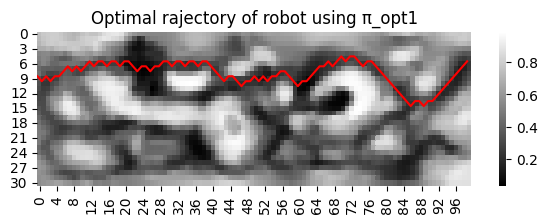

In [43]:
# Sample a trajectory following the optimal policy
trajectory1 = [np.argmax(np.array(evaluation_opt1)[:, 0])]
for column in range(n-1):
    current_row = trajectory1[column]
    action = np.random.choice(π_opt1[current_row, column, :, 1], p=π_opt1[current_row, column, :, 0].astype(np.float64))
    next_row, _ = mountain.next_state((current_row, column), action)
    trajectory1.append(next_row)

# Plot the optimal trajectory
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot(np.arange(n), trajectory1, c="r")
plt.title("Optimal rajectory of robot using π_opt1")
plt.show()

Let's do the same again, however now with truncated policy iteration!

In [44]:
# Start from π_rnd
π_opt2 = deepcopy(π_rnd)
π_improved = np.array([[[(0.0, "upforward"), (0.0, "forward"), (0.0, "downforward")] for column in range(n)] for row in range(m)], dtype="object")

# Run until converged at a single policy
iterations = 0
while np.any(π_improved != π_opt2):
    iterations += 1
    π_improved = deepcopy(π_opt2)
    
    # Policy evaluation
    evaluation_opt2 = [[0] * n for _ in range(m)]
    for k in range(3):
        for column in range(n):
            for row in range(m):
                state = (row, column)
                evaluation = 0
                for probability, action in π_improved[state]:
                    if probability > 0:
                        (next_row, next_column) = mountain.next_state(state, action)
                        reward = mountain.get_reward(state, action)
                        evaluation += probability * (reward + gamma * evaluation_opt2[next_row][next_column])

                evaluation_opt2[row][column] = evaluation

    # Policy improvement
    for row in range(m):
        for column in range(n-1):
            possible_actions = [action for _, action in π_improved[row, column] if not (row == 0 and action == "upforward" or row == m and action == "downforward")]
            best_action = possible_actions[np.argmax([evaluation_opt2[next_row][next_column] for (next_row, next_column) in map(lambda action : mountain.next_state((row, column), action), possible_actions)])]

            improved_policy = []
            for i, (probability, action) in enumerate(π_opt2[row, column]):
                improved_policy.append((1.0, action) if action == best_action else (0.0, action))
            π_opt2[row, column] = improved_policy

print("Policy converged after", iterations, "iterations.")

Policy converged after 96 iterations.


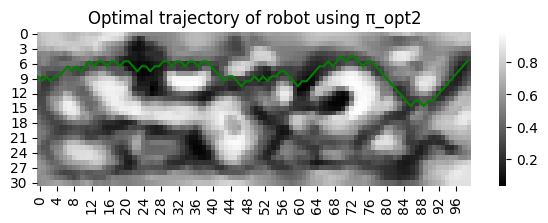

In [45]:
# Sample a trajectory following the optimal policy
trajectory2 = [np.argmax(np.array(evaluation_opt2)[:, 0])]
for column in range(n-1):
    current_row = trajectory2[column]
    action = np.random.choice(π_opt2[current_row, column, :, 1], p=π_opt2[current_row, column, :, 0].astype(np.float64))
    next_row, _ = mountain.next_state((current_row, column), action)
    trajectory2.append(next_row)

# Plot the optimal trajectory
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot(np.arange(n), trajectory2, c="g")
plt.title("Optimal trajectory of robot using π_opt2")
plt.show()

Let's start at (15, 0) and find an optimal policy using value iteration.

In [46]:
# First we implement value iteration using truncated policy
# iteration with k = 1

# Start from π_rnd
π_opt3 = deepcopy(π_rnd)
π_improved = np.array([[[(0.0, "upforward"), (0.0, "forward"), (0.0, "downforward")] for column in range(n)] for row in range(m)], dtype="object")

# Run until converged at a single policy
iterations = 0
while np.any(π_improved != π_opt3):
    iterations += 1
    π_improved = deepcopy(π_opt3)
    
    # Policy evaluation
    evaluation_opt3 = [[0] * n for _ in range(m)]
    for k in range(1):
        for column in range(n):
            for row in range(m):
                state = (row, column)
                evaluation = 0
                for probability, action in π_improved[state]:
                    if probability > 0:
                        (next_row, next_column) = mountain.next_state(state, action)
                        reward = mountain.get_reward(state, action)
                        evaluation += probability * (reward + gamma * evaluation_opt3[next_row][next_column])

                evaluation_opt3[row][column] = evaluation

    # Policy improvement
    for row in range(m):
        for column in range(n-1):
            possible_actions = [action for _, action in π_improved[row, column] if not (row == 0 and action == "upforward" or row == m and action == "downforward")]
            best_action = possible_actions[np.argmax([evaluation_opt3[next_row][next_column] for (next_row, next_column) in map(lambda action : mountain.next_state((row, column), action), possible_actions)])]

            improved_policy = []
            for i, (probability, action) in enumerate(π_opt3[row, column]):
                improved_policy.append((1.0, action) if action == best_action else (0.0, action))
            π_opt3[row, column] = improved_policy

print("Policy converged after", iterations, "iterations.")

Policy converged after 55 iterations.


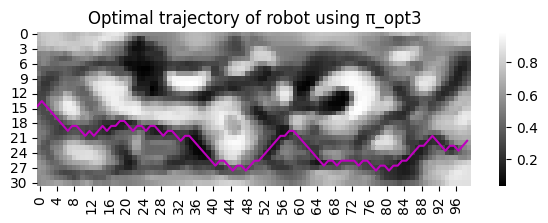

In [47]:
# Sample a trajectory following the optimal policy starting from (15, 0)
trajectory3 = [15]
for column in range(n-1):
    current_row = trajectory3[column]
    action = np.random.choice(π_opt3[current_row, column, :, 1], p=π_opt3[current_row, column, :, 0].astype(np.float64))
    next_row, _ = mountain.next_state((current_row, column), action)
    trajectory3.append(next_row)

# Plot the optimal trajectory starting from (15, 0)
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot(np.arange(n), trajectory3, c="m")
plt.title("Optimal trajectory of robot using π_opt3")
plt.show()

Then let's do the same, but as a direct implementation of the Bellman optimality equation (without policy improvement steps).

In [48]:
# Direct implementation of the Bellman optimality equation

# Start from π_rnd
π_opt4 = deepcopy(π_rnd)

evaluation_opt4 = [[0] * n for _ in range(m)]

# Run until value iteration has converged
iterations = 0
max_change = 1
while max_change > 0:
    iterations += 1
    max_change = 0
    for column in range(n):
        for row in range(m):
            state = (row, column)
            evaluation_max = -1e9
            for probability, action in π_opt4[state]:
                if probability > 0:
                    (next_row, next_column) = mountain.next_state(state, action)
                    reward = mountain.get_reward(state, action)
                    evaluation_max = max(reward + gamma * evaluation_opt4[next_row][next_column], evaluation_max)

            max_change = max(abs(evaluation_max - evaluation_opt4[row][column]), max_change)
            evaluation_opt4[row][column] = evaluation_max


# At last, update the policy
for row in range(m):
    for column in range(n-1):
        possible_actions = [action for _, action in π_improved[row, column] if not (row == 0 and action == "upforward" or row == m and action == "downforward")]
        best_action = possible_actions[np.argmax([evaluation_opt4[next_row][next_column] for (next_row, next_column) in map(lambda action : mountain.next_state((row, column), action), possible_actions)])]

        improved_policy = []
        for i, (probability, action) in enumerate(π_opt4[row, column]):
            improved_policy.append((1.0, action) if action == best_action else (0.0, action))
        π_opt4[row, column] = improved_policy

print("Policy converged after", iterations, "iterations.")

Policy converged after 90 iterations.


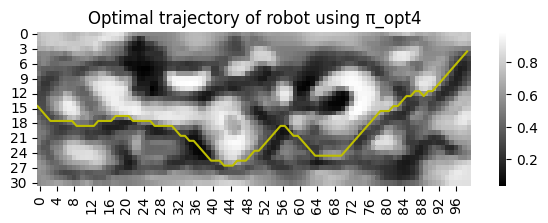

In [49]:
# Sample a trajectory following the optimal policy starting from (15, 0)
trajectory4 = [15]
for column in range(n-1):
    current_row = trajectory4[column]
    action = np.random.choice(π_opt4[current_row, column, :, 1], p=π_opt4[current_row, column, :, 0].astype(np.float64))
    next_row, _ = mountain.next_state((current_row, column), action)
    trajectory4.append(next_row)

# Plot the optimal trajectory starting from (15, 0)
plt.figure(figsize=(7,2))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot(np.arange(n), trajectory4, c="y")
plt.title("Optimal trajectory of robot using π_opt4")
plt.show()

Let's plot all 4 trajectories to compare them.

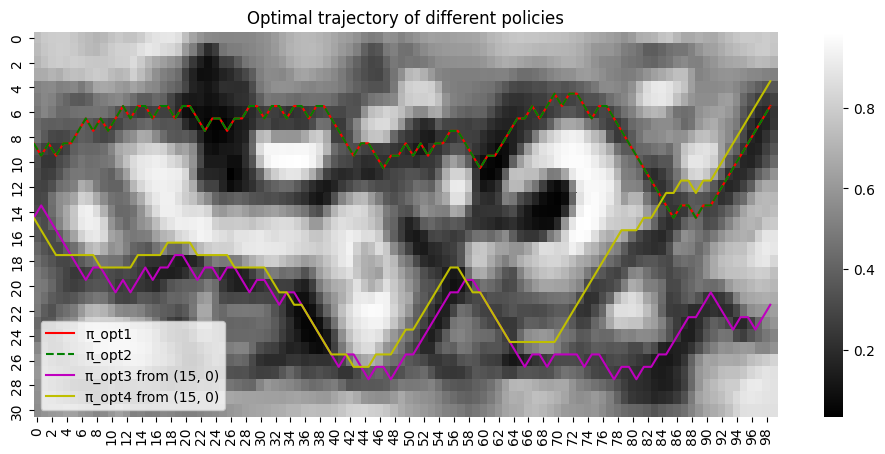

In [56]:
plt.figure(figsize=(12,5))
sns.heatmap(mountain.get_map(), cmap="gray")
plt.plot(np.arange(n), trajectory1, c="r", label="π_opt1")
plt.plot(np.arange(n), trajectory2, c="g", label="π_opt2", linestyle="dashed")
plt.plot(np.arange(n), trajectory3, c="m", label="π_opt3 from (15, 0)")
plt.plot(np.arange(n), trajectory4, c="y", label="π_opt4 from (15, 0)")
plt.title("Optimal trajectory of different policies")
plt.legend()
plt.show()

------------------------------------------
### 19. (*)

As we can see, π_opt1 and π_opt2 are identical! π_opt3 and π_opt4 are similar, but they diverge after column ~70.

π_opt1 and π_opt2 are identical as they both converge towards the same policy, only π_opt2 takes "shorter" steps each time. 

π_opt3 and π_opt4 are similar, but calculation of π_opt4 "skips" the policy improvement steps, therefore "shortcutting" part of the algorithm. This will lead to faster convergence, but probably sacrifices the precision one has when calculating π_opt3.

------------------------------------------

------------------------------------------
### 20. (*)

The most efficient solution for policy iteration was definitely value iteration. More specifically, value iteration as a direct implementation of the Bellman optimality equation. This makes sense, as this is the policy calculation which performs the least operations (in a sense).

During the policy evaluatuion step, I calculated the states from left-to-right, meaning from column 0 to column 100.

------------------------------------------